## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train.csv')
valid_data = pd.read_csv('./data/test.csv')

In [2]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [3]:
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [4]:
train_data.nunique()

Id                                170000
Band Name                             54
Band Genre                             8
Band Country of Origin                 4
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2163
Personnality Trait 3                2205
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [5]:
valid_data.nunique()

Id                                30000
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2037
Personnality Trait 3               2043
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [6]:
# Observe correlation between personnalities

train_data[['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4']].corr()


,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4
Personnality Trait 1,1.000000,0.005117,-0.017076,-0.012334
Personnality Trait 2,0.005117,1.000000,-0.001677,0.002682
Personnality Trait 3,-0.017076,-0.001677,1.000000,0.027111
Personnality Trait 4,-0.012334,0.002682,0.027111,1.000000


In [7]:
# Convert "Insert Band Name" "Insert Band Genre" "Insert Band Country of Origin" to NaN

train_data = train_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})
valid_data = valid_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})

In [8]:
train_data = train_data.dropna()

In [9]:
train_data.nunique()

Id                                155613
Band Name                             53
Band Genre                             7
Band Country of Origin                 3
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2149
Personnality Trait 3                2191
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

### One hot encoder method for "Band Genre", "Band Country of Origin", "Band Name", "Concert Goer Country of Origin"

In [10]:
# remove "Concert Goer ID" and "Concert ID" column
train_data = train_data.drop(['Concert Goer ID'], axis=1)
train_data = train_data.drop(['Id'], axis=1)

In [11]:
valid_data = valid_data.drop(['Concert Goer ID'], axis=1)
valid_data = valid_data.drop(['Id'], axis=1)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Apply ont hot ender to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(valid_data[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))

# One hot encoding removed index; put it back
OH_cols_train.index = train_data.index
OH_cols_valid.index = valid_data.index

# Remove categorical columns (will replace with one-hot encoding)
numeric_train_data = train_data.drop(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)
numeric_valid_data = valid_data.drop(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)

# Add one-hot encoded columns to numerical features
new_train_data = pd.concat([OH_cols_train,numeric_train_data], axis=1)
new_valid_data = pd.concat([OH_cols_valid,numeric_valid_data], axis=1)

In [13]:
# print columns name
new_train_data

,0,1,2,3,4,5,6,7,8,9,...,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Height (cm),Concert Enjoyment
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,158.0,Enjoyed
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,150.0,Worst Concert Ever
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,166.0,Did Not Enjoy
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,0.091389,-0.691694,0.603638,0.500926,43.0,166.0,Best Concert Ever
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,0.755175,1.753481,0.942377,-0.657241,67.0,171.0,Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,180.0,Did Not Enjoy
169996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,143.0,Worst Concert Ever
169997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,176.0,Did Not Enjoy
169998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,176.0,Did Not Enjoy


In [14]:
train_data

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
1,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,158.0,United Kingdom (UK),Enjoyed
3,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,150.0,Canada,Worst Concert Ever
4,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,166.0,United Kingdom (UK),Did Not Enjoy
5,A Dozen Running Iced Frogs,Pop Music,Canada,1998.0,627.0,540000.0,False,False,True,0.091389,-0.691694,0.603638,0.500926,43.0,166.0,Canada,Best Concert Ever
7,Ron's Midnight Jockies,Rock n Roll,United States of America (USA),1980.0,412.0,54.0,True,False,False,0.755175,1.753481,0.942377,-0.657241,67.0,171.0,Canada,Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,180.0,United States of America (USA),Did Not Enjoy
169996,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,143.0,Bulgaria,Worst Concert Ever
169997,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,176.0,Canada,Did Not Enjoy
169998,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,176.0,Canada,Did Not Enjoy


In [15]:
enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

In [16]:
new_train_data = new_train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

In [17]:
# Convert all false value to 0 and all true value to 1
train_data = train_data.replace({False: 0, True: 1})
valid_data = valid_data.replace({False: 0, True: 1})

In [18]:
train_data

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
1,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,1,0,1,-2.069449,0.017777,-1.910675,0.610265,43.0,158.0,United Kingdom (UK),2
3,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,0,1,0,-0.858054,1.022827,-0.348389,-1.147251,17.0,150.0,Canada,0
4,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,0,0,0,-0.793029,-1.166528,-0.043766,0.969661,59.0,166.0,United Kingdom (UK),1
5,A Dozen Running Iced Frogs,Pop Music,Canada,1998.0,627.0,540000.0,0,0,1,0.091389,-0.691694,0.603638,0.500926,43.0,166.0,Canada,3
7,Ron's Midnight Jockies,Rock n Roll,United States of America (USA),1980.0,412.0,54.0,1,0,0,0.755175,1.753481,0.942377,-0.657241,67.0,171.0,Canada,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,1,0,0,-0.095021,0.175175,0.914245,0.357359,50.0,180.0,United States of America (USA),1
169996,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,0,0,0,-0.733719,-0.285776,-0.323312,0.641180,71.0,143.0,Bulgaria,0
169997,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,0,0,0,0.744969,-0.965547,1.020598,1.027389,27.0,176.0,Canada,1
169998,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,0,1,1,0.821976,0.351411,0.175762,1.455654,39.0,176.0,Canada,1


In [19]:
train_data.describe()

,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Height (cm),Concert Enjoyment
count,155613.000000,155613.000000,1.556130e+05,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000
mean,1985.895684,499.434430,2.695900e+05,0.495029,0.199019,0.498512,0.029857,-9.312488,-0.017499,0.002708,46.971056,164.664148,1.500357
std,16.371499,288.473212,1.638581e+07,0.499977,0.399264,0.499999,0.991596,3200.736056,1.005046,1.005983,17.463256,14.366261,0.806088
min,1955.000000,0.000000,5.400000e+01,0.000000,0.000000,0.000000,-3.124408,-293861.500146,-3.275108,-3.287787,16.000000,140.000000,0.000000
25%,1976.000000,250.000000,4.030000e+02,0.000000,0.000000,0.000000,-0.638873,-0.689943,-0.711015,-0.698374,32.000000,152.000000,1.000000
50%,1988.000000,500.000000,2.980000e+03,0.000000,0.000000,0.000000,0.022664,-0.021836,0.007932,0.014184,47.000000,164.000000,2.000000
75%,1998.000000,749.000000,2.202600e+04,1.000000,0.000000,1.000000,0.697311,0.648032,0.680300,0.697340,63.000000,177.000000,2.000000
max,2014.000000,999.000000,1.627540e+09,1.000000,1.000000,1.000000,3.628828,325834.016795,3.308810,3.830923,76.000000,190.000000,3.000000


In [20]:
# Convert to numpy array
train_data_np = new_train_data.to_numpy(dtype = np.float64)
valid_data_np = new_valid_data.to_numpy(dtype = np.float64)

In [21]:
train_data_np.shape

(155613, 228)

In [22]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# train model using "Concert Enjoyment" column as output
X = train_data_np[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_np[:,-1]

# Process test data
val_size = 0.2
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

In [315]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6693763454679819

In [316]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6704687851428204

In [317]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.7)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6698583041480577

In [319]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.5)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6715933553963307

In [320]:
clf = XGBClassifier(n_estimators=1500, max_depth=6, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6710471355589114

In [321]:
clf = XGBClassifier(n_estimators=1500, max_depth=7, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6702117405134467

In [322]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6712720496096135

In [323]:
clf = XGBClassifier(n_estimators=2500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6719789223403914

In [324]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.671561224817659

In [325]:
clf = XGBClassifier(n_estimators=1000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6669665520676027

In [326]:
clf = XGBClassifier(n_estimators=1000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6701796099347749

In [327]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6730392314365582

In [328]:
clf = XGBClassifier(n_estimators=1500, max_depth=8, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.669472737203997

In [329]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6728464479645279

In [330]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6733284066446037

In [331]:
clf = XGBClassifier(n_estimators=2500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.673167753751245

In [332]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6743565851620987

In [26]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
pd.cross_tab(y_test, clf.predict(X_test))

In [ ]:
clf = XGBClassifier(n_estimators=1500, max_depth=20, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
pd.cross_tab(y_test, clf.predict(X_test))

### Test avec Random Forest

----

In [314]:
clf = RandomForestClassifier(n_estimators=500, max_depth=25)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6490055585901102

---

In [23]:
# do grid search
from sklearn.model_selection import GridSearchCV

param_grid = { 
    '"n_estimators': [1500,2000, 2500],
    'max_depth': [5],
    'colsample_bytree': [1,0.6, 0.8],
    'subsample': [0.9, 0.8, 1]
}

In [24]:
clf = XGBClassifier()
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 2, verbose=1, n_jobs=2)
CV_clf.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[11:58:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { ""n_estimators" } are not used.



GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'"n_estimators': [1500, 2000, 2500],
                         'colsample_bytree': [1, 0.6, 0.8], 'max_depth': [5],
                         'subsample': [0.9, 0.8, 1]},
             verbose=1)

In [25]:
CV_clf.best_params_

{'"n_estimators': 1500,
 'colsample_bytree': 0.8,
 'max_depth': 5,
 'subsample': 0.9}

# Model selection

[0.01778647 0.12713481 0.11433895 0.12318145 0.08374479 0.01845542
 0.01786639 0.14928068 0.12430436 0.08804409 0.0102362  0.01003063
 0.01289929 0.00981774 0.04020634 0.00999649 0.00981484 0.03286099]


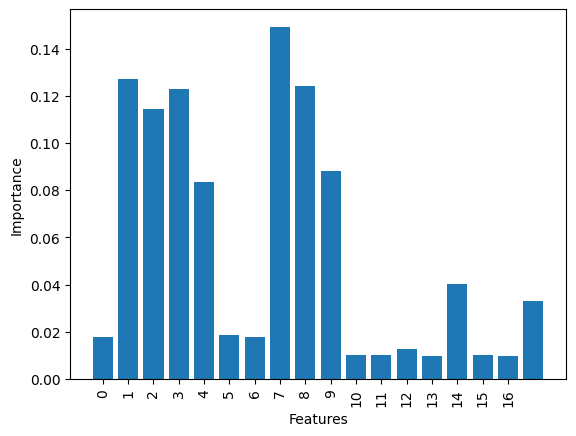

In [238]:
print(clf.feature_importances_)
feature_importance = clf.feature_importances_

# plot feature importance
# xticks every 1
from matplotlib import pyplot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
# 1 tick at every bar
plt.xticks(np.arange(0, 17, 1))
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [241]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_1 = np.delete(X_train, idx, axis=1)
X_test_1 = np.delete(X_test, idx, axis=1)

test_data_np_1 = np.delete(test_data_np, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)
clf_1 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_1.fit(X_train_1, y_train)
f1_score(y_test, clf_1.predict(X_test_1), average='micro')

0.6739067570606947

In [242]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_2 = np.delete(X_train_1, idx, axis=1)
X_test_2 = np.delete(X_test_1, idx, axis=1)

test_data_np_2 = np.delete(test_data_np_1, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_2 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_2.fit(X_train_2, y_train)
f1_score(y_test, clf_2.predict(X_test_2), average='micro')

0.6721717058124217

In [243]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_3 = np.delete(X_train_2, idx, axis=1)
X_test_3 = np.delete(X_test_2, idx, axis=1)

test_data_np_3 = np.delete(test_data_np_2, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_3 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_3.fit(X_train_3, y_train)
f1_score(y_test, clf_3.predict(X_test_3), average='micro')

0.6734569289592905

In [244]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_4 = np.delete(X_train_3, idx, axis=1)
X_test_4 = np.delete(X_test_3, idx, axis=1)

test_data_np_4 = np.delete(test_data_np_3, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_4 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_4.fit(X_train_4, y_train)
f1_score(y_test, clf_4.predict(X_test_4), average='micro')

0.6724930115991389

In [245]:
# Get the index of the least important feature and drop it
idx = np.where(feature_importance == min(feature_importance))
X_train_5 = np.delete(X_train_4, idx, axis=1)
X_test_5 = np.delete(X_test_4, idx, axis=1)

test_data_np_5 = np.delete(test_data_np_4, idx, axis=1)
feature_importance = np.delete(feature_importance, idx)

clf_5 = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf_5.fit(X_train_5, y_train)
f1_score(y_test, clf_5.predict(X_test_5), average='micro')

0.6631751437843395

In [ ]:
feature_importance

array([0.0191594 , 0.12968221, 0.10829692, 0.13273063, 0.07986314,
       0.01759029, 0.14482088, 0.1347176 , 0.07959795, 0.01487757,
       0.03928966, 0.04325046], dtype=float32)

## Test set prediction

In [255]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.8)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734890595379622

In [256]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.7)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6719789223403914

In [184]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

NameError: name 'X_train_3' is not defined

In [258]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=1)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6734569289592905

In [259]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.6)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

0.6729749702792147

In [260]:
best_model = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.5)
best_model.fit(X_train_3, y_train)
f1_score(y_test, best_model.predict(X_test_3), average='micro')

In [254]:
best_model.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 4}

In [289]:
best_model = XGBClassifier()
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [290]:
f1_score(y_test, best_model.predict(X_test), average='micro')

1.0

In [291]:
best_y_pred = best_model.predict(valid_data_np)
best_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [293]:
len(valid_data_np)

30000

In [294]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Worst Concert Ever    0.999533
Did Not Enjoy         0.000467
Name: Predicted, dtype: float64

In [262]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [260]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64